In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# previous app

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

#### ---------------------------------------------------------------------------------------------------------------

## steps 

 -> aulieu d'une colonne pour status , faire 3 colonne (refus accept cancel) avec un system binaire -> ok

 -> pareil pour le name_client_type (si client est nvx,old ou autre) -> ok

 -> again same for NAME_CONTRACT_TYPE -> ok

  -> rajouter une colonne count pour le nb de demandes -> ok

  -> supprimer les outliers, klkun qui fait 60 demandes c trop (définir les outliers) voir le Q3



In [2]:
df_previous_app=pd.read_csv('data/previous_application.csv')

In [3]:
df_copy_app=df_previous_app

## clean version

##### adding the binary system columns

for type of client: repeater and refreshed as old, new as new and XNA as other

In [4]:
# create a list of our conditions
conditions = [
    (df_copy_app['NAME_CLIENT_TYPE'] == 'New'),
    (df_copy_app['NAME_CLIENT_TYPE'] == 'Repeater') | (df_copy_app['NAME_CLIENT_TYPE'] <= 'Refreshed'),
    (df_copy_app['NAME_CLIENT_TYPE'] == 'XNA') 
    ]

# create a list of the values we want to assign for each condition
values =[0,1,2] # for ['New', 'Old', 'Other']

# create a new column and use np.select to assign values to it using our lists as arguments
df_copy_app['CLIENT_TYPE'] = np.select(conditions, values)
df_copy_app['CLIENT_TYPE'] = df_copy_app['CLIENT_TYPE'].astype(int)

In [5]:
df_copy_app[['NAME_CLIENT_TYPE','CLIENT_TYPE']]

,NAME_CLIENT_TYPE,CLIENT_TYPE
0,Repeater,1
1,Repeater,1
2,Repeater,1
3,Repeater,1
4,Repeater,1
...,...,...
1670209,Refreshed,1
1670210,New,0
1670211,Repeater,1
1670212,Repeater,1


### doing the same for status  ( create 3 columns to have only one row per id : refused & accepted and the cancelled (change the unused offer as cancelled))

In [6]:
df_previous_app['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [7]:
df_copy_app['Approved_loan']=np.where(df_copy_app['NAME_CONTRACT_STATUS']=="Approved",'1','0')
df_copy_app['Rejected_loan']=np.where(df_copy_app['NAME_CONTRACT_STATUS']=="Refused",'1','0')
df_copy_app['Canceled_loan']=np.where((df_copy_app['NAME_CONTRACT_STATUS']=="Canceled" ) | (df_copy_app['NAME_CONTRACT_STATUS'] == 'Unused offer'),'1','0')

In [8]:
df_copy_app[['NAME_CONTRACT_STATUS','Approved_loan','Rejected_loan']]

,NAME_CONTRACT_STATUS,Approved_loan,Rejected_loan
0,Approved,1,0
1,Approved,1,0
2,Approved,1,0
3,Approved,1,0
4,Refused,0,1
...,...,...,...
1670209,Approved,1,0
1670210,Approved,1,0
1670211,Approved,1,0
1670212,Approved,1,0


##### Do the same for contract type

In [9]:
df_copy_app['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [10]:
df_copy_app['Cash_loans']=np.where(df_copy_app['NAME_CONTRACT_TYPE']=="Cash loans",'1','0')
df_copy_app['Consumer_loans']=np.where(df_copy_app['NAME_CONTRACT_TYPE']=="Consumer loans",'1','0')
df_copy_app['Revolving_loans']=np.where(df_copy_app['NAME_CONTRACT_TYPE']=="Revolving loans" ,'1','0') 
df_copy_app['Other_type_of_loans']=np.where(df_copy_app['NAME_CONTRACT_TYPE']=="XNA" ,'1','0') 

In [11]:
df_copy_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CLIENT_TYPE,Approved_loan,Rejected_loan,Canceled_loan,Cash_loans,Consumer_loans,Revolving_loans,Other_type_of_loans
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,-37.0,0.0,1,1,0,0,0,1,0,0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,365243.0,1.0,1,1,0,0,1,0,0,0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,365243.0,1.0,1,1,0,0,1,0,0,0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,-177.0,1.0,1,1,0,0,1,0,0,0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,NaN,NaN,1,0,1,0,1,0,0,0


### doing the same for FLAG_LAST_APPL_PER_CONTRACT

de base c'est déja un système binaire (value = Y or N) donc on le convert en int

In [12]:
2333333333333333333# df_copy_app[df_copy_app['FLAG_LAST_APPL_PER_CONTRACT']=='Y']['FLAG_LAST_APPL_PER_CONTRACT']
df_copy_app['FLAG_LAST_APPL_PER_CONTRACT']=np.where(df_copy_app['FLAG_LAST_APPL_PER_CONTRACT']=='N','0','1')
df_copy_app['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

# yy= np.where(df_copy_app['FLAG_LAST_APPL_PER_CONTRACT']=='N','1','0') 
# pd.Series([item for sublist in yy for item in sublist]).value_counts()



1    1661739
0       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [13]:
df_copy_app[df_copy_app['SK_ID_CURR']==100003]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CLIENT_TYPE,Approved_loan,Rejected_loan,Canceled_loan,Cash_loans,Consumer_loans,Revolving_loans,Other_type_of_loans
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,-527.0,1.0,1,1,0,0,1,0,0,0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,-639.0,0.0,1,1,0,0,0,1,0,0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,-1976.0,1.0,1,1,0,0,0,1,0,0


#### deleting the columns status, type_client and NAME_CONTRACT_TYPE

In [14]:
df_copy_app.drop('NAME_CONTRACT_STATUS',axis=1,inplace=True)

In [15]:
df_copy_app.drop('NAME_CLIENT_TYPE',axis=1,inplace=True) 

In [16]:
df_copy_app.drop('NAME_CONTRACT_TYPE',axis=1,inplace=True)

#### convert the binary system of the contract status type into int (rejected,accepted & canceled columns) and NAME_CONTRACT_TYPE

In [17]:
df_copy_app[['Approved_loan','Rejected_loan','Canceled_loan']]=df_copy_app[['Approved_loan','Rejected_loan','Canceled_loan']].astype(int)
df_copy_app[['Cash_loans','Consumer_loans','Revolving_loans','Other_type_of_loans']]=df_copy_app[['Cash_loans','Consumer_loans','Revolving_loans','Other_type_of_loans']].astype(int)

In [18]:
df_copy_app.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT              

#### Calculating nb_demand per id column

###  Adding the nb_demands to our file by using join


In [19]:
test = df_copy_app.groupby(by=['SK_ID_CURR']).agg({"SK_ID_PREV":"count"}).rename(columns={'SK_ID_PREV':'nb_demands'})
new_test = test.reset_index()
new_test


,SK_ID_CURR,nb_demands
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2
...,...,...
338852,456251,1
338853,456252,1
338854,456253,2
338855,456254,2


In [20]:
df_copy_app=df_copy_app.merge(new_test,how='left')
df_copy_app

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NFLAG_INSURED_ON_APPROVAL,CLIENT_TYPE,Approved_loan,Rejected_loan,Canceled_loan,Cash_loans,Consumer_loans,Revolving_loans,Other_type_of_loans,nb_demands
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,1,...,0.0,1,1,0,0,0,1,0,0,3
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,1,...,1.0,1,1,0,0,1,0,0,0,6
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,1,...,1.0,1,1,0,0,1,0,0,0,4
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,1,...,1.0,1,1,0,0,1,0,0,0,23
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,1,...,NaN,1,0,1,0,1,0,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,1,...,0.0,1,1,0,0,0,1,0,0,5
1670210,2357031,334635,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,1,...,0.0,0,1,0,0,0,1,0,0,7
1670211,2659632,249544,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,1,...,0.0,1,1,0,0,0,1,0,0,3
1670212,2785582,400317,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,1,...,1.0,1,1,0,0,1,0,0,0,9


In [21]:
# df_copy_app.head(3)

Checking duplicates 

In [22]:
df_copy_app[df_copy_app.duplicated(keep='first')==True]

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NFLAG_INSURED_ON_APPROVAL,CLIENT_TYPE,Approved_loan,Rejected_loan,Canceled_loan,Cash_loans,Consumer_loans,Revolving_loans,Other_type_of_loans,nb_demands


### Checking on NANs

In [23]:
df_copy_app.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
NAME_SELLER_INDUSTRY                 0
CNT_PAYMENT              

In [24]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" 
                    "There are " + str(mis_val_table_ren_columns.shape[0]) +
                          " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [25]:
missing_values_table=missing_values_table(df_copy_app)
missing_values_table

Your selected dataframe has 43 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


### deleting all the columns with >= 40 na's

In [26]:
missing_values_na = missing_values_table[missing_values_table['% of Total Values'] >= 40]
droped_columns = missing_values_na.index
df_copy_app_merged_clean = df_copy_app.drop(columns=droped_columns)

### Replace the other na's with the most_frequent

In [27]:
# Call simplifier to replace missing values that are less that 40%
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df_copy_app_merged_clean)

SimpleImputer(strategy='most_frequent')

In [28]:
df_copy_app_merged_clean=pd.DataFrame(imp.fit_transform(df_copy_app_merged_clean), columns=df_copy_app_merged_clean.columns)

#### Checking that everything is ok and that there's no na left

In [29]:
df_copy_app_merged_clean.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
CLIENT_TYPE                    0
Approved_loan                  0
Rejected_loan                  0
Canceled_loan                  0
Cash_loans                     0
Consumer_loans                 0
Revolving_loans                0
Other_type

In [30]:
df_copy_app_merged_clean.head(3)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,PRODUCT_COMBINATION,CLIENT_TYPE,Approved_loan,Rejected_loan,Canceled_loan,Cash_loans,Consumer_loans,Revolving_loans,Other_type_of_loans,nb_demands
0,2030495,271877,1730.43,17145.0,17145.0,17145.0,SATURDAY,15,1,1,...,POS mobile with interest,1,1,0,0,0,1,0,0,3
1,2802425,108129,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,1,1,...,Cash X-Sell: low,1,1,0,0,1,0,0,0,6
2,2523466,122040,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,1,1,...,Cash X-Sell: high,1,1,0,0,1,0,0,0,4


### Focus on the outliers 

<AxesSubplot:>

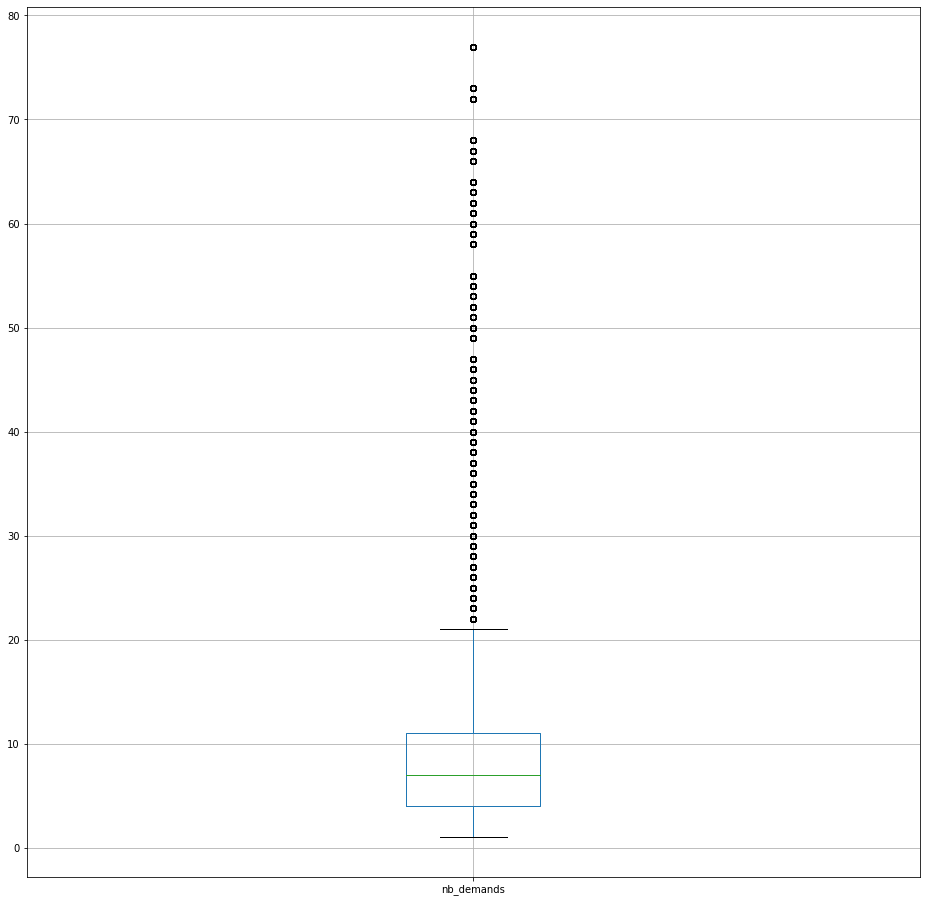

In [31]:
df_copy_app[['nb_demands']].boxplot(figsize=(16,16))

Nombre de users qui ont demandés >= 20 loans

In [32]:
df_copy_app_merged_clean[df_copy_app_merged_clean['nb_demands']>=20].count()['nb_demands']/df_copy_app_merged_clean.shape[0]*100

5.7251346234674125

###  Deleting the outliers (users who have more than 20 active demands)

In [33]:
df_copy_app_merged_clean.shape

(1670214, 32)

In [34]:
df_copy_app_merged_clean_noOutliers = df_copy_app_merged_clean.drop(df_copy_app_merged_clean[df_copy_app_merged_clean['nb_demands']>=20].index)
df_copy_app_merged_clean_noOutliers.shape


(1574592, 32)

In [35]:
df_copy_app_merged_clean_noOutliers['CLIENT_TYPE'].value_counts()

1    1274753
0     298078
2       1761
Name: CLIENT_TYPE, dtype: int64

## convert cols to int

In [36]:
def convert_from_cat_to_num(mylist):
    for col in mylist:
        df_copy_app_merged_clean_noOutliers[col]=df_copy_app_merged_clean_noOutliers[col].astype(int)



mylist= \
    [ \
        'Approved_loan','Rejected_loan','Canceled_loan','Cash_loans','Consumer_loans','Revolving_loans','Other_type_of_loans', \
        'nb_demands','NFLAG_LAST_APPL_IN_DAY','CLIENT_TYPE','FLAG_LAST_APPL_PER_CONTRACT' \
    ]
convert_from_cat_to_num(mylist)

#### Extract nb_demands and type client per id

In [37]:
nbb=df_copy_app_merged_clean_noOutliers[['SK_ID_CURR','nb_demands']].groupby(by='SK_ID_CURR').first()
nbb=nbb.reset_index()
nbb

,SK_ID_CURR,nb_demands
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2
...,...,...
334990,456251,1
334991,456252,1
334992,456253,2
334993,456254,2


In [38]:
# df_copy_app_merged_clean_noOutliers[['SK_ID_CURR','CLIENT_TYPE']].groupby(by='SK_ID_CURR').first()
typec=df_copy_app_merged_clean_noOutliers[['SK_ID_CURR','CLIENT_TYPE']].groupby(by='SK_ID_CURR').first()
typec=typec.reset_index()
typec

,SK_ID_CURR,CLIENT_TYPE
0,100001,1
1,100002,0
2,100003,1
3,100004,0
4,100005,1
...,...,...
334990,456251,0
334991,456252,0
334992,456253,1
334993,456254,1


In [39]:
df_copy_app_merged_clean_noOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1574592 entries, 0 to 1670213
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   SK_ID_PREV                   1574592 non-null  object
 1   SK_ID_CURR                   1574592 non-null  object
 2   AMT_ANNUITY                  1574592 non-null  object
 3   AMT_APPLICATION              1574592 non-null  object
 4   AMT_CREDIT                   1574592 non-null  object
 5   AMT_GOODS_PRICE              1574592 non-null  object
 6   WEEKDAY_APPR_PROCESS_START   1574592 non-null  object
 7   HOUR_APPR_PROCESS_START      1574592 non-null  object
 8   FLAG_LAST_APPL_PER_CONTRACT  1574592 non-null  int64 
 9   NFLAG_LAST_APPL_IN_DAY       1574592 non-null  int64 
 10  NAME_CASH_LOAN_PURPOSE       1574592 non-null  object
 11  DAYS_DECISION                1574592 non-null  object
 12  NAME_PAYMENT_TYPE            1574592 non-null  object
 1

## creating the final version of our file

In [40]:
final_df_previous_app=df_copy_app_merged_clean_noOutliers.groupby(by='SK_ID_CURR').sum()[['NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT','Approved_loan','Rejected_loan','Canceled_loan','Cash_loans','Consumer_loans','Revolving_loans','Other_type_of_loans']]
final_df_previous_app=final_df_previous_app.reset_index()
final_df_previous_app[['SK_ID_CURR','CLIENT_TYPE']]=typec[['SK_ID_CURR','CLIENT_TYPE']]
final_df_previous_app[['SK_ID_CURR','nb_demands']]=nbb[['SK_ID_CURR','nb_demands']]
final_df_previous_app

,SK_ID_CURR,NFLAG_LAST_APPL_IN_DAY,FLAG_LAST_APPL_PER_CONTRACT,Approved_loan,Rejected_loan,Canceled_loan,Cash_loans,Consumer_loans,Revolving_loans,Other_type_of_loans,CLIENT_TYPE,nb_demands
0,100001,1,1,1,0,0,0,1,0,0,1,1
1,100002,1,1,1,0,0,0,1,0,0,0,1
2,100003,3,3,3,0,0,1,2,0,0,1,3
3,100004,1,1,1,0,0,0,1,0,0,0,1
4,100005,2,2,1,0,1,1,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
334990,456251,1,1,1,0,0,0,1,0,0,0,1
334991,456252,1,1,1,0,0,0,1,0,0,0,1
334992,456253,2,2,2,0,0,0,2,0,0,1,2
334993,456254,2,2,2,0,0,0,2,0,0,1,2


In [41]:
final_df_previous_app.SK_ID_CURR.drop_duplicates()

df_copy_app_merged_clean_noOutliers.groupby(by='SK_ID_CURR').sum().shape


(334995, 11)

In [42]:
final_df_previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334995 entries, 0 to 334994
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   SK_ID_CURR                   334995 non-null  int64
 1   NFLAG_LAST_APPL_IN_DAY       334995 non-null  int64
 2   FLAG_LAST_APPL_PER_CONTRACT  334995 non-null  int64
 3   Approved_loan                334995 non-null  int64
 4   Rejected_loan                334995 non-null  int64
 5   Canceled_loan                334995 non-null  int64
 6   Cash_loans                   334995 non-null  int64
 7   Consumer_loans               334995 non-null  int64
 8   Revolving_loans              334995 non-null  int64
 9   Other_type_of_loans          334995 non-null  int64
 10  CLIENT_TYPE                  334995 non-null  int64
 11  nb_demands                   334995 non-null  int64
dtypes: int64(12)
memory usage: 30.7 MB


## save to csv

In [43]:
final_df_previous_app.to_csv("PREVIOUS_APPLICATION.csv",index=True)